In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score

In [2]:
# Import the data
df = pd.read_csv("C:/Users/z011348/Desktop/ML/input/Early stage diabetes risk/diabetes_data.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [31]:
df['class'] = np.where(df['class'] == 'Positive', 1, 0) # 1 - Positive, 0 - Negative
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


In [32]:
# Check for missing data
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [20]:
# Check for categorical data
df.select_dtypes(['object']).columns

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [33]:
df_object = df.select_dtypes('object')
df_object

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


In [34]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                  int32
dtype: object

In [35]:
# Convert categorical data into numeric

In [36]:
# Identify the categorical data 
cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object']] # Categorical Varible

cat_var

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [37]:
# for Data ready
from sklearn.preprocessing import OneHotEncoder

In [38]:
# creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [39]:
ohe.fit(df_object)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [40]:
codes = ohe.transform(df_object).toarray()

In [41]:
feature_names = ohe.get_feature_names(cat_var)

In [42]:
feature_names

array(['Gender_Female', 'Gender_Male', 'Polyuria_No', 'Polyuria_Yes',
       'Polydipsia_No', 'Polydipsia_Yes', 'sudden weight loss_No',
       'sudden weight loss_Yes', 'weakness_No', 'weakness_Yes',
       'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No',
       'muscle stiffness_Yes', 'Alopecia_No', 'Alopecia_Yes',
       'Obesity_No', 'Obesity_Yes'], dtype=object)

In [43]:
df_tmp = pd.concat([df.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [44]:
df_tmp

,Age,class,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,40,1,0,1,1,0,0,1,1,0,...,0,1,1,0,0,1,0,1,0,1
1,58,1,0,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
2,41,1,0,1,0,1,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
3,45,1,0,1,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
4,60,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,0,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
516,48,1,1,0,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
517,58,1,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,1,0,0,1
518,32,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0


In [45]:
X = df_tmp.drop("class", axis=1)
y = df_tmp['class']

np.random.seed(42)
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((416, 31), (104, 31), (416,), (104,))

In [46]:
lr = LogisticRegression(random_state=42)

In [47]:
lr.fit(X_train, y_train)

C:\Users\z011348\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
lr.score(X_test, y_test)

0.9230769230769231

In [49]:
# ===========================================
# Modele processing 
# ===========================================
models={"RandomForestClassifier": RandomForestClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression()
        }

In [50]:
# create function to fit score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    # Loop thru models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model score and sppend it to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

C:\Users\z011348\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
# Print the model scores
model_scores

{'RandomForestClassifier': 0.9903846153846154,
 'KNeighborsClassifier': 0.8846153846153846,
 'LogisticRegression': 0.9230769230769231}

In [55]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9903846153846154

In [56]:
# Predict on train set
y_preds = forest.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [57]:
# Evaluate the model

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_preds)

array([[33,  0],
       [ 1, 70]], dtype=int64)

In [60]:
# visualize confusion matrix with pd.crosstab()
cf = pd.crosstab(y_test,
                 y_preds,
                 rownames=["Actual labels"],
                 colnames=["Predicted labels"])
cf

Predicted labels,0,1
Actual labels,,
0,33,0
1,1,70


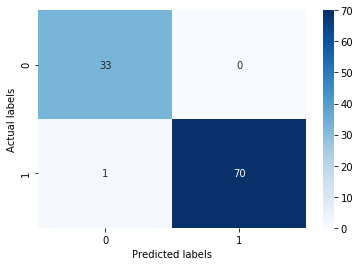

In [61]:
sns.heatmap(cf, annot=True, cmap='Blues');

In [62]:
# Lets get classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
# Predict for all dataset

In [64]:
# Predict on train set
df_preds = forest.predict(X)
df_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [65]:
df_predict = pd.DataFrame()
df_predict["class"] = df_tmp["class"]
df_predict["class_predicted"] = pd.DataFrame(df_preds)
df_predict.head(20)

,class,class_predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
